# classifier test

Suppose we have some data on 2 type of tree that grow in a specific geographical region. Suppose X1, X2 are the coordinates and we ask the question "given coordinates x1, x2, what type of trees grow there?"

We will now generate this data (imagine we collected it in a forest!) and plot it


In [10]:
import numpy as np

# Generate the input variables
X = np.random.randn(100, 2)

# Generate the output variables
y = np.where(X[:, 0] > X[:, 1], 1, 0)

# print(X)
# print(y)

Text(0.5, 1.0, 'X vs y')

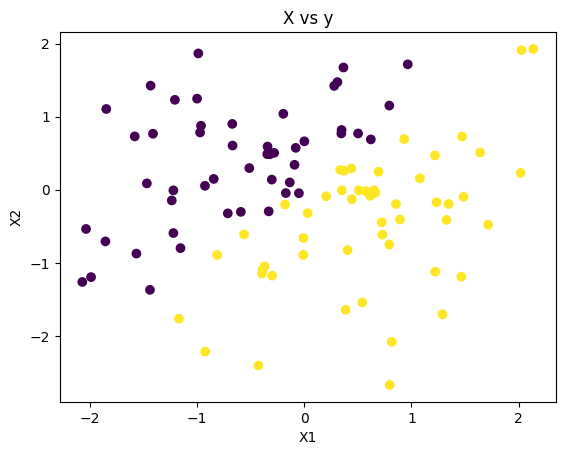

In [2]:
import matplotlib.pyplot as plt

# # Load the dataset
# data = np.load("dataset.npz")
# X = data["X"]
# y = data["y"]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)

# Label the axes
plt.xlabel("X1")
plt.ylabel("X2")

# Add a title
plt.title("X vs y")


In [11]:
import torch

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()

        # Input layer
        self.input_layer = torch.nn.Linear(2, 4)

        # Hidden layers
        self.hidden_layer_1 = torch.nn.Linear(4, 4)
        self.hidden_layer_2 = torch.nn.Linear(4, 4)

        # Output layer
        self.output_layer = torch.nn.Linear(4, 1)

        # Activation function
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.relu(x)

        x = self.hidden_layer_1(x)
        x = self.relu(x)

        x = self.hidden_layer_2(x)
        x = self.relu(x)

        x = self.output_layer(x)

        return x

# Create a model instance
model = NeuralNetwork()

# Define the loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    # Generate training data
    x_train = torch.from_numpy(X).float()
    y_train = torch.from_numpy(y).float()

    # Forward pass
    y_pred = model(x_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(loss.item())

# Evaluate the model
x_test = torch.randn(10, 2)
y_pred = model(x_test)

# Calculate the loss
# loss = loss_fn(y_pred, y_train)
# print("Loss:", loss)


0.425633043050766
0.3866742253303528
0.35317379236221313
0.3261081576347351
0.3061121106147766
0.2935815751552582
0.2876552641391754
0.28641870617866516
0.2867228388786316
0.2859541177749634
0.283139705657959
0.27842873334884644
0.2725871205329895
0.266675740480423
0.26150232553482056
0.2575073838233948
0.25484755635261536
0.2533125877380371
0.2525453269481659
0.25217726826667786
